<a href="https://colab.research.google.com/github/Serahverg-8/Deep-Learning-pytorch/blob/main/pytorch_3_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:

#device agnostic code
import torch
torch.cuda.is_available()
import matplotlib.pyplot as plt
from torch import nn

In [48]:

device = "cuda" if torch.cuda.is_available() else "cpu"

image shapes are usually [ batch, color, width , height]

#Architecture


Input layer - number of features.
Hidden Layer -  as many as we want.
Output layer - number of classes or value. etc.



Hidden layers activation : has the sigma portion and the activaton portion (Relu).

Output layers activation  : sigmoid to spit out a probability   


Loss function :  binary cross entropy , multiclass - just Cross entropy.

Optimizer : SDG , adam etc.


# Getting the data

In [49]:
import sklearn

In [50]:
from sklearn.datasets import make_circles

In [51]:
n_samples= 1000

In [52]:
X, y = make_circles(n_samples, noise = 0.03, random_state=42)

In [53]:
len(X)

1000

In [54]:
print(X[0:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [55]:
print(y[0:5])

[1 1 1 1 0]


2 input features and a binary classification

In [56]:
import pandas as pd
circles= pd.DataFrame({ "X1" : X[:,0],"X2": X[:,1],"label" :y})

In [57]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [58]:
#Visualizing the data
import matplotlib.pyplot as plt

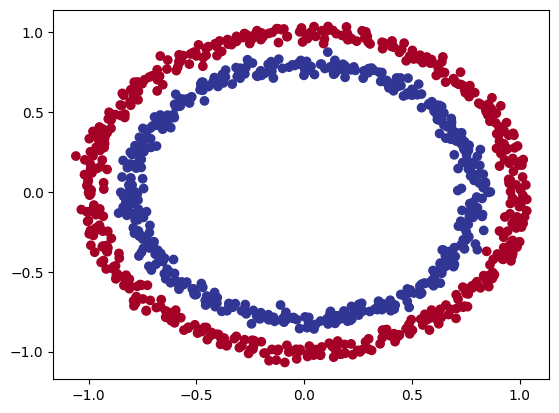

In [59]:
# plt.scatter(circles['X1'],circles['X2'],c=circles['X1'], cmap = plt.cm.RdYlBu)
plt.scatter(circles['X1'],circles['X2'],c=y, cmap = plt.cm.RdYlBu)
#c=y is the gradient of the output. If it has 0 or 1

In [60]:
#given 2 numbers: is it an inner circle or an outter circle




# Input and Output shapes

In [61]:
X.shape

(1000, 2)

In [62]:
y.shape

(1000,)

In [63]:
#turning into tensors


In [64]:
X= torch.from_numpy(X).type(torch.float)

In [65]:
y = torch.from_numpy(y).type(torch.float)

In [66]:
type(X)

torch.Tensor

In [67]:
X.dtype

torch.float32

In [68]:
#split into train and test using sklearn
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

#Building the model

In [71]:
from torch import nn

In [72]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [73]:

#build the model

class circle_classification(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer_1 = nn.Linear(in_features=2,out_features=5) #5-hidden layers
    self.linear_layer_2 = nn.Linear(in_features=5,out_features=1) #1 - output layer

  def forward(self,x):
    return self.linear_layer_2(self.linear_layer_1(x))
    #x-->layer1 --> layer 2

In [74]:
model_0 = circle_classification().to(device)

In [75]:
next(model_0.parameters()).device

device(type='cpu')

In [76]:
model_0.state_dict()

OrderedDict([('linear_layer_1.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('linear_layer_1.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('linear_layer_2.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('linear_layer_2.bias', tensor([-0.1213]))])

#Building the model using nn.sequential instead of nn.moduule

In [77]:
from pandas.core.generic import RandomState

model_1 = nn.Sequential(
      nn.Linear(in_features=2,out_features=5),
      nn.Linear(in_features=5,out_features=1)
).to(device)

In [78]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732]])),
             ('0.bias', tensor([-0.5424,  0.5802,  0.2037,  0.2929,  0.2236])),
             ('1.weight',
              tensor([[-0.0078,  0.3500, -0.3178,  0.0282, -0.3052]])),
             ('1.bias', tensor([0.1379]))])


# Loss and optimizer:


In [79]:
# Binary or categorical cross entropy is a usual loss functions.

In [80]:
loss_function = torch.nn.BCEWithLogitsLoss()
#more numerically stable

WE can also use BCEloss() but this requires the input to have already passed through the sigmoid activation function.

In [81]:
optimizer = torch.optim.SGD(params=model_1.parameters(),lr =0.1)

In [82]:

# accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [83]:
#Train:


#forward pass
#loss
#optimizer-zero-grad
#loss backward
#optimizer step


In [84]:
#raw output from our model -->logits --> prediction prob---> prediction labels

# logits ----> sidmoid(Binary) ---> prediction probabilities
              #softmax(multiclass)

#Then you can do argmax or roundit

Remember: turn model into train mode when we want to train and turn it into eval mode when we want to test it. This will stop tracking the gradient descent

In [85]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [86]:
epoch =100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


In [87]:
for epoch in range(epoch):
  model_1.train()

  y_logits = model_1(X_train).squeeze()

  #pass logits through sigmoid and then round -- > o.5 cutoff

  y_pred=torch.round(torch.sigmoid(y_logits))

  #accuracy
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)


  #loss:

  #here we pass y_logits because of the kind of loss function we use. We use BCEwithlogitloss which takes in the logits and automatically applies the sigmoid to i
  loss =loss_function(y_logits,y_train)

   #IF WE WERE USE BCE LOSS
   #loss=loss(torch.sigmoid(y_logits),y_train). -> cuz we need to pass the predicted probabilities

   #optimize zero grad
  optimizer.zero_grad()

  #backpropagation
  loss.backward()

  #optimizer step
  optimizer.step()

  #Test eval
  model_1.eval()

  with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_function(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)


  if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.70234, Accuracy: 57.38% | Test loss: 0.70194, Test acc: 57.00%
Epoch: 10 | Loss: 0.69697, Accuracy: 52.75% | Test loss: 0.69803, Test acc: 54.00%
Epoch: 20 | Loss: 0.69505, Accuracy: 51.62% | Test loss: 0.69667, Test acc: 51.00%
Epoch: 30 | Loss: 0.69427, Accuracy: 51.12% | Test loss: 0.69607, Test acc: 51.00%
Epoch: 40 | Loss: 0.69390, Accuracy: 50.38% | Test loss: 0.69572, Test acc: 49.50%
Epoch: 50 | Loss: 0.69367, Accuracy: 50.50% | Test loss: 0.69547, Test acc: 49.00%
Epoch: 60 | Loss: 0.69352, Accuracy: 50.38% | Test loss: 0.69526, Test acc: 49.00%
Epoch: 70 | Loss: 0.69341, Accuracy: 50.50% | Test loss: 0.69509, Test acc: 49.00%
Epoch: 80 | Loss: 0.69333, Accuracy: 50.38% | Test loss: 0.69495, Test acc: 49.00%
Epoch: 90 | Loss: 0.69326, Accuracy: 50.25% | Test loss: 0.69483, Test acc: 48.50%


In [89]:
#ITS NOT TRAINING VERY WELL.

circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [90]:
#visualize predictions

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



In [91]:
from helper_functions import plot_predictions, plot_decision_boundary

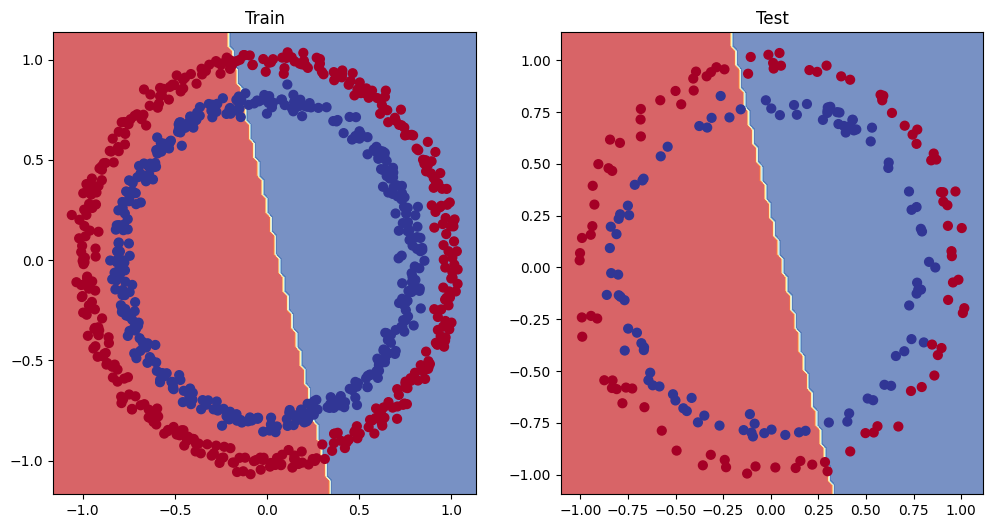

In [92]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [ ]:
#our model is building a straight line as a decision boundary rather than a circle as the boundary.

WE have created a linear model. lol

In [93]:
#So lets modify using the RElu activation fucntion:

# Build model with non-linear activation function
from torch import nn
class Circle_classificationV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers

      #between each layer is a RElu activation function.
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_2 = Circle_classificationV2().to(device)
print(model_2)

Circle_classificationV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
#or use nn.sequential()

In [96]:
model_3 = nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10,out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10,out_features=1),

).to(device)

In [97]:
model_3.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3041, -0.0775],
                      [-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427],
                      [ 0.1554,  0.0910],
                      [-0.6231,  0.2968],
                      [-0.1061, -0.3239],
                      [ 0.6074,  0.1576],
                      [-0.3912, -0.3579]])),
             ('0.bias',
              tensor([-0.0338,  0.3948, -0.1807, -0.4035, -0.2421, -0.5283,  0.2522,  0.5473,
                      -0.6657,  0.1642])),
             ('2.weight',
              tensor([[ 0.1634,  0.0573, -0.1126,  0.1651,  0.1662,  0.1182, -0.0556, -0.0837,
                        0.0338, -0.0559],
                      [-0.0942,  0.2021,  0.2718, -0.0313, -0.0708,  0.0046, -0.0189,  0.0760,
                        0.0886, -0.2872],
                      [-0.1167,  0.2663,  0.1232, -0.0157, -0.1907, -0.1935, -0.2833, -0.1

In [98]:
#continuing with model 2

In [99]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [100]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_2(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%
